In [1]:
# Third party
import importlib
import torch
import matplotlib.pyplot as plt

# User
import base.abstract
import base.mlp
import base.train
import base.encode
import base.pre_process
import base.viz
import model

importlib.reload(base.abstract)
importlib.reload(base.mlp)
importlib.reload(base.train)
importlib.reload(base.encode)
importlib.reload(base.pre_process)
importlib.reload(base.viz)
importlib.reload(model)

from base.mlp import MLP, LinearLayer
from base.train import sgd
from base.encode import get_encoder_decoder
from base.pre_process import get_dataset
from base.viz import plot_2d_char_embedding
from model import EmbMLP

In [2]:
encoder, decoder = get_encoder_decoder(training_data="../data/shakespear.txt", type='character')
# let's now encode the entire text dataset and store it into a torch.Tensor
with open("../data/shakespear.txt", 'r', encoding='utf-8') as f:
    text = f.read()
text_encoded = torch.tensor(encoder(text), dtype=torch.long)
unique_chars = sorted(list(set(text)))
set(text), text[0:10], text_encoded[0:10]

({'\n',
  ' ',
  '!',
  '$',
  '&',
  "'",
  ',',
  '-',
  '.',
  '3',
  ':',
  ';',
  '?',
  'A',
  'B',
  'C',
  'D',
  'E',
  'F',
  'G',
  'H',
  'I',
  'J',
  'K',
  'L',
  'M',
  'N',
  'O',
  'P',
  'Q',
  'R',
  'S',
  'T',
  'U',
  'V',
  'W',
  'X',
  'Y',
  'Z',
  'a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z'},
 'First Citi',
 tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47]))

In [10]:
token_length = 10
dataset =  get_dataset(text_encoded, token_length, context_window="fixed")
train_data, train_targets = dataset["train"]
validation_data, validation_targets = dataset["validation"]
len(train_data), len(validation_data)


(948085, 167309)

In [19]:
decoder(train_data[10].tolist()), train_data[10], train_targets[10]

('First Citi', tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47]), tensor(64))

In [21]:
hp = {
    "init_learning_rate": .1,
    "converging_learning_rate": .01,
    "epochs": 100000,
    "dim_of_embedding": 2,
    "num_layer_1_nodes": 10,
    "mini_batch_size": 3,
    "token_length": token_length
}

params = {
    "num_of_unique_chars": len(unique_chars)
}

l1 = LinearLayer(
    num_of_inputs=hp['token_length'] * hp['dim_of_embedding'],
    num_of_neurons=hp['num_layer_1_nodes'],
    activation_func=torch.tanh,
)
l2 = LinearLayer(
    num_of_inputs=hp['num_layer_1_nodes'],
    num_of_neurons=len(unique_chars),
)

mlp = MLP([l1,l2])
model = EmbMLP(hp,mlp,**params)


In [22]:
loss_list = []
model.require_grad()
sgd(hp, model, train_data, train_targets, loss_list)

epoch: 0 / 100000, loss: 7.4493
epoch: 10000 / 100000, loss: 2.3426
epoch: 20000 / 100000, loss: 2.1963
epoch: 30000 / 100000, loss: 2.3310
epoch: 40000 / 100000, loss: 3.8580
epoch: 50000 / 100000, loss: 2.5996
epoch: 60000 / 100000, loss: 3.6465
epoch: 70000 / 100000, loss: 3.3525
epoch: 80000 / 100000, loss: 2.3458
epoch: 90000 / 100000, loss: 2.4387


In [10]:
# Compute negative log likelihood of the train/validation

print(f"train loss: {model.dataset_loss(train_data, train_targets)}")
print(f"validation loss: {model.dataset_loss(validation_data, validation_targets)}" )

train loss: 2.563552619785622
validation loss: 2.569370318479979


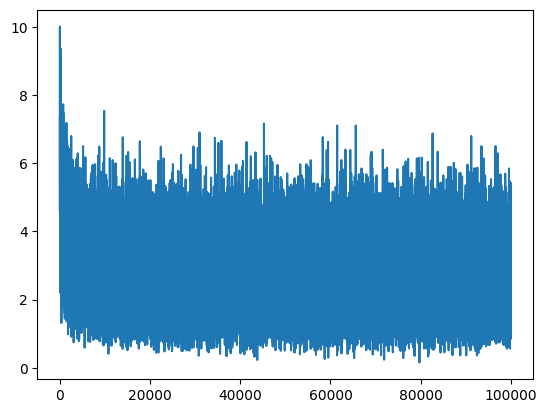

In [11]:
plt.plot(loss_list)

In [12]:
# Compute negative log likelihood of the train/validation

print(f"train loss: {model.dataset_loss(train_data, train_targets)}")
print(f"validation loss: {model.dataset_loss(validation_data, validation_targets)}" )

train loss: 2.563552619785622
validation loss: 2.569370318479979


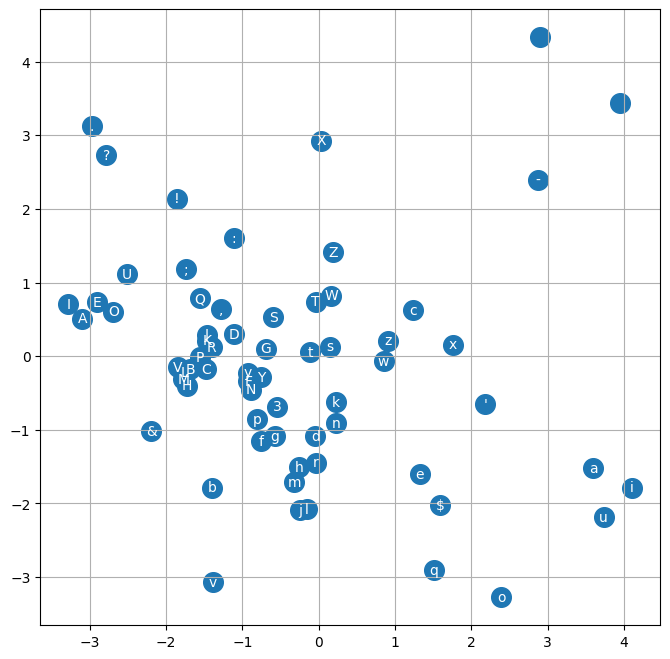

In [23]:
plot_2d_char_embedding(unique_chars, model.embedding)


In [24]:
decoder(model.generate(200))

"BUCHO:\ntop;\nMash, wo.\nTo bor pos nuxvy tourne,s nor wavin baishoto;\n?UCI:\nSad suld bap to bucn gaks's yong Do, pe tir vy hee wowlur preine thall\nI ar yopudd dou butraguaole or tond hr?\nnir bard;\nBot b"